# PDF TABLE EXTRACTION LIBRARY-CAMELOT

In [1]:
#pip install "camelot-py[cv]"
#import the library
import camelot

In [2]:
#read the pdf first,by default it will only read a single page
#we have two different method of reading pdfs lattice and stream
#I am using the stream method
tab_andra=camelot.read_pdf("Andra.pdf",pages='1-end',flavor='stream')

#it has read all the tables , now call it to get the number of table
#here we see there are 26 tables
tab_andra

<TableList n=26>

In [3]:
#getting the dim of first table
tab_andra[0]

<Table shape=(48, 6)>

In [4]:
#the details  of the table 1
print(tab_andra[0].parsing_report)

{'accuracy': 98.59, 'whitespace': 37.15, 'order': 1, 'page': 1}


In [5]:
#print the table
tab_andra[0].df

,0,1,2,3,4,5
0,,,,,% of Actuals to Budget,
1,S,,,,Estimates,
2,l.,,Budget,Actuals,,Correspond-
3,,Description,,,,
4,,,,,,ing period of
5,No,,estimates,up to,Current,
6,,,,,2016-17,the previous
7,,,2016-2017,AUG 2016,,
8,,,,,,year 2015-16
9,1,REVENUE RECEIPTS,,,,


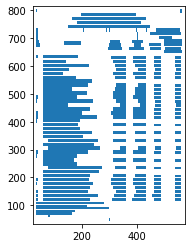

In [6]:
#check the alingment of the table , without actually opening it
import matplotlib.pyplot as plt
camelot.plot(tab_andra[0], kind='text')
plt.show()

In [7]:
#other way to count the tables
tab_andra.n

26

In [8]:
#saving the table in a csv file
tab_andra[0].to_csv("Andhra Pradesh.csv")

In [11]:
#camelot handles the rotated files easily
table1=camelot.read_pdf("rotated.pdf",flavor='stream')

In [12]:
#for reading specific pages
#camelot.read_pdf('your.pdf', pages='1-20,23')

In [13]:
import matplotlib.pyplot as plt
camelot.plot(tables[0], kind='text')
camelot.plot(table1[0], kind='text')
plt.show()

NameError: name 'tables' is not defined

In [ ]:
#various plots
camelot.plot(table1[0], kind='contour')
camelot.plot(table1[0], kind='grid')
plt.show()

specific area

In [ ]:
tables4=camelot.read_pdf("table_areas.pdf",flavor="stream")
camelot.plot(tables4[0], kind='textedge')
plt.show()

In [ ]:
#using the co-ordinates given in the above plot we can actually choose sp area of the table
#ignore the unnecessary text field
#give the coordinates of the top left and the bottom right edge of the table
#here I have tried to grb the small table present in the above figure
tables5 = camelot.read_pdf('table_areas.pdf', flavor='stream', table_areas=['300,499,600,330'])
tables5[0].df

column seperators

In [ ]:
#we can give the x-coordinates of the columns to get the re columns
tables7 = camelot.read_pdf('column_separators.pdf', flavor='stream',
                           columns=['72,95,209,327,442,529,566,606,683'])
tables7[0].df

In [ ]:
#some cells were merged so we have to split them
#use the split text
#it worked well

tables8 = camelot.read_pdf('column_separators.pdf', flavor='stream', 
                           columns=['72,95,209,327,442,529,566,606,683'],split_text=True)
tables8[0].df

In [ ]:
#but sometimes when the table area coordinates are not easily guessed we can go for the
#table regions , which will look for the table only in the given region.
tables3= camelot.read_pdf('foo.pdf', flavor='stream', table_regions=['170,370,560,270'])
tables3[0].df

In [ ]:
#some of the tables might have sub and super scripts , to deal with them we go for flag_size
#which will seperate out them and put them in enclosed brackets 
tables = camelot.read_pdf('superscript.pdf', flavor='stream', flag_size=True)
tables[0].df

In [ ]:
#by default edge_tol is 50
#manipulate the edge_tol to select sp area

tables = camelot.read_pdf('edge_tol.pdf', flavor='stream', edge_tol=300)
camelot.plot(tables[0], kind='contour')
plt.show()